In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
plt.rcParams.update({'text.color': 'white',
                     'ytick.color': 'white',
                     'xtick.color': 'white', 
                      'font.size': 18})


## 1.Подготовка датафрейма

In [2]:
df = pd.read_csv('flats_full.csv')

In [3]:
df.shape

(2044, 14)

In [4]:
df.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Unnamed: 0,header,rent,currency,landlord,landlord_type,stations,distances,main_params,extra_params,street_address,date,address,deal
1,/moskva/kvartiry/1-k_kvartira_40_m_412_et._110...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[],NaN,NaN,NaN
2,/moskva/kvartiry/1-k_kvartira_39_m_522_et._107...,"1-к квартира, 39 м², 5/22 эт.",35000,RUB,\n\n Илья\n \n,Арендодатель,"['Хорошево', 'Зорге', 'Октябрьское поле']","[' 2,9\t км', ' 3,1\t км', ' 2,9\t км']","[' Этаж: 5 ', ' Этажей в доме: 22 ', ' Тип дом...","['2 спальных места', '1 кровать', 'Телевизор',...","['\n Москва, Карамышевская набережная, 60, под...",\n 18 декабря в 09:02,"\n Москва, Карамышевская набережная, 60, подъе...",залог 35 000 ₽
3,/moskva_zelenograd/kvartiry/1-k_kvartira_40_m_...,"1-к квартира, 40 м², 5/17 эт.",20000,RUB,\n\n Финист\n \n,Агентство,[],[],"[' Этаж: 5 ', ' Этажей в доме: 17 ', ' Тип дом...","['1 спальное место', 'Wi-Fi', 'Телевизор', 'Пл...","['\n Москва, Зеленоград, к1509\n ']",\n 27 декабря в 13:13,"\n Москва, Зеленоград, к1509\n","залог 10 000 ₽, комиссия 14 000 ₽"
4,/moskva/kvartiry/studiya_56_m_29_et._126613538,"Студия, 56 м², 2/9 эт.",80000,RUB,\n\n Наталья\n \n,Агентство,"['Баррикадная', 'Улица 1905 года', 'Краснопрес...","[' 1,5\t км', ' 500\t м', ' 1,2\t км']","[' Этаж: 2 ', ' Этажей в доме: 9 ', ' Тип дома...","['2 спальных места', '1 кровать', 'Wi-Fi', 'Те...","['\n Москва, ул. 1905 года, 5\n ']",\n 10 декабря в 23:02,"\n Москва, ул. 1905 года, 5\n","залог 80 000 ₽, комиссия 32 000 ₽"


In [5]:
#Преобразуем 1 строку в название колонок датафрейма, удалим пустые строки
header = df.iloc[0,:]
df.columns = header
df = df.rename(columns={'Unnamed: 0':'url'})
df = df.drop([0,1])
df = df.reset_index(drop=True)

In [6]:
# Выведем список колонок
list(df.columns)

['url',
 'header',
 'rent',
 'currency',
 'landlord',
 'landlord_type',
 'stations',
 'distances',
 'main_params',
 'extra_params',
 'street_address',
 'date',
 'address',
 'deal']

#Рассмотрим features датафрейма:
 
 'url' - ссылка, по которому размещено объявление 
 
 'header' - название объявление
 
 'rent' - стоимость арендной платы
 
 'currency' - валюта, в которой выражается стоимость
 
 'landlord' = имя контактного лица
 
 'landlord_type' - тип контактного лица
 
 'stations' - 3 ближайших станции метро
 
 'distances' - расстояние до 3 ближайших станций метро
 
 'main_params' - основные харатеристики квартиры, включающие этаж, тип дома, общее количество этажей, площадь
 
 'extra_params' - дополнительные характеристики квартиры (кровати, балкон/лоджия, телевизор, плита, микроволновка)
 
 'street_address' - адрес дома
 
 'date' - дата размещения объявления
 
 'deal' - условия сделки (размер комиссии, залог)

In [7]:
df =df.replace('[]', None)

In [8]:
#Посмотрим на сводную статистику пустых значений
df.isnull().sum()

0
url                0
header            13
rent              13
currency           3
landlord          99
landlord_type     99
stations           0
distances          0
main_params        0
extra_params       0
street_address     0
date              65
address            3
deal              13
dtype: int64

In [9]:
#Найдем все записи без указания цены аренды
df[df.rent.isnull() ==True].head()

,url,header,rent,currency,landlord,landlord_type,stations,distances,main_params,extra_params,street_address,date,address,deal
810,/moskva/kvartiry/1-k_kvartira_44_m_410_et._183...,NaN,NaN,NaN,NaN,NaN,"['Бибирево', 'Селигерская', 'Алтуфьево']","[' 6,4 км', ' 7,8 км', ' 4,5 км']","[' Этаж: 2 ', ' Этажей в доме: 17 ', ' Тип дом...","['3 спальных места', '1 кровать', 'Wi-Fi', 'Те...","['\n Москва, 9-я Северная линия, 1к3\n ']",NaN,NaN,NaN
1185,/moskva/kvartiry/1-k_kvartira_31_m_79_et._1878...,NaN,NaN,RUB,NaN,NaN,"['Щелковская', 'Щелковская', 'Динамо', 'Алма-А...","[' 600 м', ' 700 м', ' 1,2 км', ' 800 м', ' 1,...","[' Этаж: 11 ', ' Этажей в доме: 16 ', ' Тип до...","['4 спальных места', '1 кровать', 'Телевизор',...","['\n Москва, Щёлковское шоссе, 49, подъезд 1,\...",NaN,"\n Москва, Щёлковское шоссе, 49, подъезд 1,\n",NaN
1345,/moskva/kvartiry/1-k_kvartira_35_m_1317_et._18...,NaN,NaN,RUB,NaN,NaN,"['Динамо', 'Перово', 'Селигерская', 'Перово', ...","[' 1,2 км', ' 1,1 км', ' 600 м', ' 1,2 км', ' ...","[' Этаж: 2 ', ' Этажей в доме: 24 ', ' Тип дом...","['Кабельное / цифровое ТВ', 'Холодильник', 'Ст...","['\n Москва, Скаковая улица, 18А\n ', '\n Моск...",NaN,"\n Москва, Скаковая улица, 18А\n",NaN
1553,/moskva/kvartiry/1-k_kvartira_33_m_59_et._1876...,NaN,NaN,NaN,NaN,NaN,"['Технопарк', 'Коломенская']","[' 2,3 км', ' 1,2 км']","[' Этаж: 12 ', ' Этажей в доме: 12 ', ' Тип до...","['1 спальное место', '1 кровать', 'Wi-Fi', 'Те...","['\n Москва, Кленовый б-р, 25к1\n ']",NaN,NaN,NaN
1675,/moskva/kvartiry/1-k_kvartira_36_m_720_et._183...,NaN,NaN,RUB,NaN,NaN,"['Динамо', 'Перово', 'Селигерская', 'Перово', ...","[' 1,2 км', ' 1,1 км', ' 600 м', ' 1,2 км', ' ...","[' Этаж: 1 ', ' Этажей в доме: 12 ', ' Тип дом...","['3 спальных места', '2 кровати', 'Плита', 'Хо...","['\n Москва, Скаковая улица, 18А\n ', '\n Моск...",NaN,"\n Москва, Скаковая улица, 18А\n",NaN


In [10]:
null_rent_index = df[df.rent.isnull() ==True].index
df = df.drop(null_rent_index)

In [11]:
#Убедимся, что строка удалилась
df[df.index==1675]

,url,header,rent,currency,landlord,landlord_type,stations,distances,main_params,extra_params,street_address,date,address,deal


In [12]:
#Удалим повторяющиеся строки и посмотрим на размер
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(2029, 14)
(2002, 14)


In [13]:
#Сбросим индекс после удаления повторяющихся строк
df=df.reset_index(drop=True)

In [14]:
df.head()

,url,header,rent,currency,landlord,landlord_type,stations,distances,main_params,extra_params,street_address,date,address,deal
0,/moskva/kvartiry/1-k_kvartira_39_m_522_et._107...,"1-к квартира, 39 м², 5/22 эт.",35000,RUB,\n\n Илья\n \n,Арендодатель,"['Хорошево', 'Зорге', 'Октябрьское поле']","[' 2,9\t км', ' 3,1\t км', ' 2,9\t км']","[' Этаж: 5 ', ' Этажей в доме: 22 ', ' Тип дом...","['2 спальных места', '1 кровать', 'Телевизор',...","['\n Москва, Карамышевская набережная, 60, под...",\n 18 декабря в 09:02,"\n Москва, Карамышевская набережная, 60, подъе...",залог 35 000 ₽
1,/moskva_zelenograd/kvartiry/1-k_kvartira_40_m_...,"1-к квартира, 40 м², 5/17 эт.",20000,RUB,\n\n Финист\n \n,Агентство,"['Хорошево', 'Зорге', 'Октябрьское поле']","[' 2,9\t км', ' 3,1\t км', ' 2,9\t км']","[' Этаж: 5 ', ' Этажей в доме: 17 ', ' Тип дом...","['1 спальное место', 'Wi-Fi', 'Телевизор', 'Пл...","['\n Москва, Зеленоград, к1509\n ']",\n 27 декабря в 13:13,"\n Москва, Зеленоград, к1509\n","залог 10 000 ₽, комиссия 14 000 ₽"
2,/moskva/kvartiry/studiya_56_m_29_et._126613538,"Студия, 56 м², 2/9 эт.",80000,RUB,\n\n Наталья\n \n,Агентство,"['Баррикадная', 'Улица 1905 года', 'Краснопрес...","[' 1,5\t км', ' 500\t м', ' 1,2\t км']","[' Этаж: 2 ', ' Этажей в доме: 9 ', ' Тип дома...","['2 спальных места', '1 кровать', 'Wi-Fi', 'Те...","['\n Москва, ул. 1905 года, 5\n ']",\n 10 декабря в 23:02,"\n Москва, ул. 1905 года, 5\n","залог 80 000 ₽, комиссия 32 000 ₽"
3,/moskva/kvartiry/1-k_kvartira_39_m_1517_et._92...,"1-к квартира, 39 м², 15/17 эт.",37000,RUB,\n\n собственник\n \n,Агентство,"['Шоссе Энтузиастов', 'Андроновка', 'Перово']","[' 1,6\t км', ' 2 км', ' 1,2 км']","[' Этаж: 15 ', ' Этажей в доме: 17 ', ' Тип до...","['2 спальных места', '1 кровать', 'Wi-Fi', 'Те...","['\n Москва, Перовская ул., 23\n ']",\n 27 декабря в 09:49,"\n Москва, Перовская ул., 23\n",залог 37 000 ₽
4,/moskva/kvartiry/1-k_kvartira_38_m_1214_et._12...,"1-к квартира, 38 м², 12/14 эт.",29000,RUB,\n\n Агенство\n \n,Агентство,"['Медведково', 'Бабушкинская']","[' 800 м', ' 1,5 км']","[' Этаж: 12 ', ' Этажей в доме: 14 ', ' Тип до...","['4 спальных места', '2 кровати', 'Wi-Fi', 'Те...","['\n Москва, пр. Шокальского, 45к1\n ']",\n 28 декабря в 19:35,"\n Москва, пр. Шокальского, 45к1\n","залог 29 000 ₽, комиссия 17 400 ₽"


In [15]:
# Преобразуем "stations", так, чтобы в каждой ячейке содержалось атомарное значение
tmpdf_st = df['stations']
tmplist_st =tmpdf_st.str.replace('[', '').str.replace(']', '').str.replace("'", '')
tmplist2_st = []
for i in tmplist_st:
    tmplist2_st.append(i.split(","))
stations_df = pd.DataFrame(tmplist2_st)
stations_df=stations_df.rename(columns={0:'station1',1:'station2',2:'station3'})
stations_df.head()

,station1,station2,station3
0,Хорошево,Зорге,Октябрьское поле
1,Хорошево,Зорге,Октябрьское поле
2,Баррикадная,Улица 1905 года,Краснопресненская
3,Шоссе Энтузиастов,Андроновка,Перово
4,Медведково,Бабушкинская,None


In [16]:
# Преобразуем "distanses", так, чтобы в каждой ячейке содержалось атомарное значение
tmpdf_ds = df['distances']
tmplist_ds =tmpdf_ds.str.replace('[', '').str.replace(']', '')
tmplist2_ds = []
for i in tmplist_ds:
     tmplist2_ds.append(i.split("', '"))
ds_df = pd.DataFrame(tmplist2_ds)

ds_df[0]=ds_df[0].str.replace('км', '').str.replace('м', '').str.replace("'", '').str.replace('\\', '').str.replace('t', '').str.replace(',', '.')
ds_df[1]=ds_df[1].str.replace('км', '').str.replace('м', '').str.replace("'", '').str.replace('\\', '').str.replace('t', '').str.replace(',', '.')
ds_df[2]=ds_df[2].str.replace('км', '').str.replace('м', '').str.replace("'", '').str.replace('\\', '').str.replace('t', '').str.replace(',', '.')

ds_df=ds_df.rename(columns={0:'distance1',1:'distance2',2:'distance3'})
ds_df.head()

,distance1,distance2,distance3
0,2.9,3.1,2.9
1,2.9,3.1,2.9
2,1.5,500,1.2
3,1.6,2,1.2
4,800,1.5,None


In [17]:
# Преобразуем "main_params", так, чтобы в каждой ячейке содержалось атомарное значение
tmpdf = df['main_params']
tmplist =tmpdf.str.replace('[', '').str.replace(']', '')
tmplist2 = []
for i in tmplist:
    tmplist2.append(i.split(","))
main_paramsdf = pd.DataFrame(tmplist2)
main_paramsdf=main_paramsdf.rename(columns={0:'floor',1:'total_num_floors',2:'type_of_building',3:'rooms_num',4:'total_area',5:'living_area',6:'kitchen_area'})
for i in main_paramsdf:
    main_paramsdf[i]=main_paramsdf[i].str.replace("'","")
main_paramsdf.floor=main_paramsdf.floor.str.replace('[',"")
main_paramsdf.floor=main_paramsdf.floor.str.replace('Этаж:',"")
main_paramsdf.total_num_floors = main_paramsdf.total_num_floors.str.replace('Этажей в доме: ',"")
main_paramsdf.rooms_num =main_paramsdf.rooms_num.str.replace('Количество комнат: ',"")
main_paramsdf.type_of_building =main_paramsdf.type_of_building.str.replace('Тип дома: ',"")
main_paramsdf.total_area =main_paramsdf.total_area.str.replace('Общая площадь: ',"")
main_paramsdf.living_area  = main_paramsdf.living_area.str.replace('Жилая площадь:',"")
main_paramsdf.kitchen_area  =main_paramsdf.kitchen_area.str.replace('Площадь кухни: ',"")

for i in range(len(main_paramsdf)):
    if (main_paramsdf.total_area[i] != None):
        main_paramsdf.total_area[i]=main_paramsdf.total_area[i].replace("\\xa0м²","")
    if  (main_paramsdf.living_area[i] != None):
        main_paramsdf.living_area[i]=main_paramsdf.living_area[i].replace("\\xa0м²","")
    if  (main_paramsdf.kitchen_area[i] != None):
        main_paramsdf.kitchen_area[i]=main_paramsdf.kitchen_area[i].replace("\\xa0м²","")
#main_paramsdf=main_paramsdf.rename(columns={0:'floor',1:'total_num_floors',2:'type_of_building',3:'rooms_num',4:'total_area',5:'living_area',6:'kitchen_area'})

main_paramsdf.head()

,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area,7
0,5,22,монолитный,1-комнатные,39,17,8,None
1,5,17,панельный,1-комнатные,40,20,9,None
2,2,9,кирпичный,студии,56,None,None,None
3,15,17,панельный,1-комнатные,39,19,8,None
4,12,14,панельный,1-комнатные,38,20,10,None


In [18]:
# Появился неизвестный столбец. Попробуемя разобраться, сколько ненулевых значений в нем содержится
main_paramsdf=main_paramsdf.rename(columns={7:'temp'})
main_paramsdf[main_paramsdf.temp.isnull()==False]

,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area,temp
1910,Offline проверка: нет,Этаж: 4,Этажей в доме: 14,Тип дома: панельный,Количество комнат: 1-комнатные,Общая площадь: 38,Жилая площадь: 19,Площадь кухни: 8\xa0м²


In [19]:
#изменим содержимое 1910 строки
main_paramsdf.loc[1910,'floor']=4
main_paramsdf.loc[1910,'total_num_floors']=14
main_paramsdf.loc[1910,'rooms_num']=1
main_paramsdf.loc[1910,'total_area']=38
main_paramsdf.loc[1910,'living_area']=19
main_paramsdf.loc[1910,'kitchen_area']=8
main_paramsdf=main_paramsdf.drop('temp',axis=1)
main_paramsdf.head()

,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,5,22,монолитный,1-комнатные,39,17,8
1,5,17,панельный,1-комнатные,40,20,9
2,2,9,кирпичный,студии,56,None,None
3,15,17,панельный,1-комнатные,39,19,8
4,12,14,панельный,1-комнатные,38,20,10


In [20]:
#Избавимся от лишних пробелов
for i in main_paramsdf:
    main_paramsdf[i]=main_paramsdf[i].str.replace(' ', '')  

In [21]:
#Проверим, что ничего не потеряли
main_paramsdf.shape

(2002, 7)

In [22]:
#Посмотрим на атрибуты.Переведем столбцы в числовой вид
main_paramsdf.dtypes

floor               object
total_num_floors    object
type_of_building    object
rooms_num           object
total_area          object
living_area         object
kitchen_area        object
dtype: object

In [23]:
#При попытке изменить тип данных возникла ошибка, сообщающая о недопустимом для преобразования символе. 
#Посмотрим подробнее
main_paramsdf[main_paramsdf.living_area.str.isdigit()==False]

,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
5,14,17,панельный,1-комнатные,37,Площадькухни:8,NaN
33,10,15,блочный,1-комнатные,40,Площадькухни:9,NaN
49,4,12,панельный,1-комнатные,42,19.5,12
59,5,5,кирпичный,1-комнатные,28,Площадькухни:6,NaN
80,4,5,блочный,1-комнатные,31.5,18.5,5.2
...,...,...,...,...,...,...,...
1963,13,21,монолитный,1-комнатные,40,15.2,9.7
1965,3,9,монолитный,1-комнатные,25.2,13.7,4
1967,10,12,панельный,1-комнатные,38,Площадькухни:10,NaN
1976,5,20,панельный,1-комнатные,43,Площадькухни:10,NaN


In [24]:
#Обранужили 201 запись с неверными записямм в поле living_area, которые относятся к столбцу kitchen_area
main_paramsdf.kitchen_area[main_paramsdf.living_area.str.isdigit()==False] = main_paramsdf[main_paramsdf.living_area.str.isdigit()==False].living_area 
main_paramsdf.living_area[main_paramsdf.living_area.str.isdigit()==False] = None

In [25]:
#Избавимся от лишнего текста
main_paramsdf.kitchen_area = main_paramsdf.kitchen_area.str.replace('Площадькухни:','')

In [26]:
#Проверим столбец floor на наличие нечисловых значений
main_paramsdf.floor[main_paramsdf.floor.str.isdigit()==False]

422             main_params
1186    Offlineпроверка:нет
Name: floor, dtype: object

In [27]:
#Были обнаружены 2 строки с неверными значениями. Удалим их, но только после объединения датафреймов.
main_paramsdf.iloc[[422,1186]]

,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
422,main_params,NaN,None,NaN,NaN,NaN,NaN
1186,Offlineпроверка:нет,Этаж:2,Этажейвдоме:12,Типдома:панельный,Количествокомнат:1-комнатные,None,Общаяплощадь:42


In [28]:
#Проверим, что ничего не потеряли
main_paramsdf.shape

(2002, 7)

In [29]:
#Удалим символы перевода строк
df.address=df.address.str.replace("\\n","")

In [30]:
#Выполним объединение 4 датафреймов
result = pd.merge(df, stations_df,  left_on=df.index, right_on=stations_df.index).drop('key_0', axis=1) #.reset_index(drop=True)
result1 = pd.merge(result, ds_df, left_on=result.index, right_on=ds_df.index).drop('key_0', axis=1)
result2=pd.merge(result1, main_paramsdf, left_on=result.index, right_on=main_paramsdf.index).drop('key_0', axis=1)

In [31]:
#Для того, чтобы можно было перейти к анализу данных и последующему обучению, удалим лишние столбцы. Учтем их позднее.
df_apartment = result2.drop(['url','currency','landlord','stations','distances','extra_params','main_params','street_address','date','deal'],axis=1)

In [32]:
#Убедимся, что ничего не потеряли
df_apartment.shape

(2002, 17)

In [33]:
df_apartment.head()

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,"1-к квартира, 39 м², 5/22 эт.",35000,Арендодатель,"Москва, Карамышевская набережная, 60, подъезд 1",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5,22,монолитный,1-комнатные,39,17,8
1,"1-к квартира, 40 м², 5/17 эт.",20000,Агентство,"Москва, Зеленоград, к1509",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5,17,панельный,1-комнатные,40,20,9
2,"Студия, 56 м², 2/9 эт.",80000,Агентство,"Москва, ул. 1905 года, 5",Баррикадная,Улица 1905 года,Краснопресненская,1.5,500,1.2,2,9,кирпичный,студии,56,NaN,NaN
3,"1-к квартира, 39 м², 15/17 эт.",37000,Агентство,"Москва, Перовская ул., 23",Шоссе Энтузиастов,Андроновка,Перово,1.6,2,1.2,15,17,панельный,1-комнатные,39,19,8
4,"1-к квартира, 38 м², 12/14 эт.",29000,Агентство,"Москва, пр. Шокальского, 45к1",Медведково,Бабушкинская,None,800,1.5,None,12,14,панельный,1-комнатные,38,20,10


In [34]:
#Удалим строки, не содержащие информации
df_apartment=df_apartment.drop([422,1186])

In [35]:
df_apartment.dtypes

header              object
rent                object
landlord_type       object
address             object
station1            object
station2            object
station3            object
distance1           object
distance2           object
distance3           object
floor               object
total_num_floors    object
type_of_building    object
rooms_num           object
total_area          object
living_area         object
kitchen_area        object
dtype: object

In [36]:
df_apartment = df_apartment.astype({'floor': 'float','total_num_floors': 'float','total_area': 'float',
                     'living_area': 'float','kitchen_area': 'float' , 'rent':'float','distance1':'float',
                     'distance2':'float','distance3':'float'})

In [37]:
df_apartment

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,"1-к квартира, 39 м², 5/22 эт.",35000.0,Арендодатель,"Москва, Карамышевская набережная, 60, подъезд 1",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,22.0,монолитный,1-комнатные,39.0,17.0,8.0
1,"1-к квартира, 40 м², 5/17 эт.",20000.0,Агентство,"Москва, Зеленоград, к1509",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,17.0,панельный,1-комнатные,40.0,20.0,9.0
2,"Студия, 56 м², 2/9 эт.",80000.0,Агентство,"Москва, ул. 1905 года, 5",Баррикадная,Улица 1905 года,Краснопресненская,1.5,500.0,1.2,2.0,9.0,кирпичный,студии,56.0,NaN,NaN
3,"1-к квартира, 39 м², 15/17 эт.",37000.0,Агентство,"Москва, Перовская ул., 23",Шоссе Энтузиастов,Андроновка,Перово,1.6,2.0,1.2,15.0,17.0,панельный,1-комнатные,39.0,19.0,8.0
4,"1-к квартира, 38 м², 12/14 эт.",29000.0,Агентство,"Москва, пр. Шокальского, 45к1",Медведково,Бабушкинская,None,800.0,1.5,NaN,12.0,14.0,панельный,1-комнатные,38.0,20.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,"1-к квартира, 40 м², 15/17 эт.",38000.0,Арендодатель,"Москва, Сходненская ул., 6к1",Сходненская,Тушинская,Планерная,1.2,1.4,2.3,15.0,17.0,монолитный,1-комнатные,40.0,19.0,10.0
1998,"1-к квартира, 60 м², 18/18 эт.",109999.0,Агентство,"Москва, ул. Серпуховский Вал, 21к3",Тульская,Шаболовская,Площадь Гагарина,900.0,1.0,1.5,18.0,18.0,монолитный,1-комнатные,60.0,15.0,26.0
1999,"Студия, 15 м², 11/24 эт.",17500.0,Арендодатель,"Москва, Ярославское ш., 124",Свиблово,Медведково,Бабушкинская,4.1,3.7,3.1,11.0,24.0,панельный,студии,15.0,7.0,3.0
2000,"1-к квартира, 40 м², 8/15 эт.",24000.0,Агентство,"Москва, ул. Маршала Савицкого, 4к1",Улица Скобелевская,Бульвар адмирала Ушакова,Улица Горчакова,5.0,4.9,5.0,8.0,15.0,панельный,1-комнатные,40.0,24.0,8.0


In [38]:
#Проверим столбцы на наличие пустых значений
df_apartment.isnull().sum()

header                0
rent                  0
landlord_type        85
address               0
station1              0
station2             85
station3            285
distance1             0
distance2            86
distance3           300
floor                 1
total_num_floors      1
type_of_building      0
rooms_num             1
total_area            1
living_area         442
kitchen_area        296
dtype: int64

In [39]:
#Глянем на общую статистику по числовым столбцам. Можно сразу определить пределы и заметить, например,
#что за 250000 руб. квартир должно быть совсем немного.
df_apartment.describe()

,rent,distance1,distance2,distance3,floor,total_num_floors,total_area,living_area,kitchen_area
count,2000.000000,2000.000000,1914.000000,1700.000000,1999.000000,1999.000000,1999.000000,1558.000000,1704.000000
mean,38940.233500,173.085350,166.389603,189.881529,7.010005,13.639820,37.514557,19.859435,9.423357
std,16399.652584,290.158844,296.703203,302.988523,4.927086,6.374242,7.675665,4.893353,3.754913
min,15000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,6.000000,2.000000
25%,30000.000000,1.600000,1.500000,1.400000,3.000000,9.000000,34.000000,18.000000,7.000000
50%,35000.000000,2.300000,2.100000,2.200000,6.000000,14.000000,38.000000,20.000000,9.000000
75%,43000.000000,300.000000,300.000000,400.000000,10.000000,17.000000,40.000000,20.000000,10.000000
max,250000.000000,900.000000,900.000000,900.000000,35.000000,49.000000,140.000000,100.000000,37.100000


In [40]:
df_apartment.head(1)

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,"1-к квартира, 39 м², 5/22 эт.",35000.0,Арендодатель,"Москва, Карамышевская набережная, 60, подъезд 1",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,22.0,монолитный,1-комнатные,39.0,17.0,8.0


In [41]:
#Для удобства переведем стоимость аренты в тыс. руб.
df_apartment.rent=df_apartment.rent/1000

In [42]:
#Т.к. в изначальном датафрейме расстояние приводилось и в метрах и в километрах, преобразуем все в километры
df_apartment.distance1[df_apartment.distance1>=100]=df_apartment.distance1[df_apartment.distance1>=100]/1000
df_apartment.distance2[df_apartment.distance2>=100]=df_apartment.distance2[df_apartment.distance2>=100]/1000
df_apartment.distance3[df_apartment.distance3>=100]=df_apartment.distance3[df_apartment.distance3>=100]/1000

C:\Users\AVP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\AVP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AVP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd fr

In [43]:
df_apartment.head()

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,"1-к квартира, 39 м², 5/22 эт.",35.0,Арендодатель,"Москва, Карамышевская набережная, 60, подъезд 1",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,22.0,монолитный,1-комнатные,39.0,17.0,8.0
1,"1-к квартира, 40 м², 5/17 эт.",20.0,Агентство,"Москва, Зеленоград, к1509",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,17.0,панельный,1-комнатные,40.0,20.0,9.0
2,"Студия, 56 м², 2/9 эт.",80.0,Агентство,"Москва, ул. 1905 года, 5",Баррикадная,Улица 1905 года,Краснопресненская,1.5,0.5,1.2,2.0,9.0,кирпичный,студии,56.0,NaN,NaN
3,"1-к квартира, 39 м², 15/17 эт.",37.0,Агентство,"Москва, Перовская ул., 23",Шоссе Энтузиастов,Андроновка,Перово,1.6,2.0,1.2,15.0,17.0,панельный,1-комнатные,39.0,19.0,8.0
4,"1-к квартира, 38 м², 12/14 эт.",29.0,Агентство,"Москва, пр. Шокальского, 45к1",Медведково,Бабушкинская,None,0.8,1.5,NaN,12.0,14.0,панельный,1-комнатные,38.0,20.0,10.0


In [44]:
#Еще раз вернемся к вопросу пустых значений
df_apartment.isnull().sum()

header                0
rent                  0
landlord_type        85
address               0
station1              0
station2             85
station3            285
distance1             0
distance2            86
distance3           300
floor                 1
total_num_floors      1
type_of_building      0
rooms_num             1
total_area            1
living_area         442
kitchen_area        296
dtype: int64

In [45]:
#Обработаем столбец floor
df_apartment[df_apartment.floor.isnull()==True]

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
1910,"1-к квартира, 38 м², 4/14 эт.",35.0,Арендодатель,"ул Белореченская, 37к1",Братиславская,Люблино,Марьино,1.4,1.4,2.4,NaN,NaN,Этажейвдоме:14,NaN,NaN,NaN,NaN


In [46]:
# Ввиду того, что у данной квартиры много других пустых полей - удалим данную запись
df_apartment = df_apartment.drop(1910)

In [47]:
# Заполним нулями все пустые значения в оставшихся столбцах 
df_apartment = df_apartment.fillna({'landlord_type' : 0, 'living_area' : 0,'kitchen_area' : 0,
                                    'station2' : 0,'station3' : 0,'distance2' : 0,
                                    'distance3' : 0,})


In [48]:
df_apartment.isnull().sum()

header              0
rent                0
landlord_type       0
address             0
station1            0
station2            0
station3            0
distance1           0
distance2           0
distance3           0
floor               0
total_num_floors    0
type_of_building    0
rooms_num           0
total_area          0
living_area         0
kitchen_area        0
dtype: int64

In [49]:
df_apartment.head()

,header,rent,landlord_type,address,station1,station2,station3,distance1,distance2,distance3,floor,total_num_floors,type_of_building,rooms_num,total_area,living_area,kitchen_area
0,"1-к квартира, 39 м², 5/22 эт.",35.0,Арендодатель,"Москва, Карамышевская набережная, 60, подъезд 1",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,22.0,монолитный,1-комнатные,39.0,17.0,8.0
1,"1-к квартира, 40 м², 5/17 эт.",20.0,Агентство,"Москва, Зеленоград, к1509",Хорошево,Зорге,Октябрьское поле,2.9,3.1,2.9,5.0,17.0,панельный,1-комнатные,40.0,20.0,9.0
2,"Студия, 56 м², 2/9 эт.",80.0,Агентство,"Москва, ул. 1905 года, 5",Баррикадная,Улица 1905 года,Краснопресненская,1.5,0.5,1.2,2.0,9.0,кирпичный,студии,56.0,0.0,0.0
3,"1-к квартира, 39 м², 15/17 эт.",37.0,Агентство,"Москва, Перовская ул., 23",Шоссе Энтузиастов,Андроновка,Перово,1.6,2.0,1.2,15.0,17.0,панельный,1-комнатные,39.0,19.0,8.0
4,"1-к квартира, 38 м², 12/14 эт.",29.0,Агентство,"Москва, пр. Шокальского, 45к1",Медведково,Бабушкинская,0,0.8,1.5,0.0,12.0,14.0,панельный,1-комнатные,38.0,20.0,10.0


In [50]:
#Преобразуем категориальные признаки
columns=['landlord_type','type_of_building','rooms_num']
df_apartment1=pd.get_dummies(df_apartment, columns=columns)

In [51]:
df_apartment1.columns

Index(['header', 'rent', 'address', 'station1', 'station2', 'station3',
       'distance1', 'distance2', 'distance3', 'floor', 'total_num_floors',
       'total_area', 'living_area', 'kitchen_area', 'landlord_type_0',
       'landlord_type_Агентство', 'landlord_type_Арендодатель',
       'type_of_building_блочный', 'type_of_building_деревянный',
       'type_of_building_кирпичный', 'type_of_building_монолитный',
       'type_of_building_панельный', 'rooms_num_1-комнатные',
       'rooms_num_студии'],
      dtype='object')

In [52]:
#Переименуем кириллические названия
df_apartment1 =df_apartment1.rename(columns={'landlord_type_Агентство':'landlord_agency',
                              'landlord_type_Арендодатель':'landlord_owner',
                              'type_of_building_блочный':'block_building',
                              'type_of_building_кирпичный':'brick_building',
                              'type_of_building_деревянный':'wood_building',
                              'type_of_building_монолитный':'monolite_building',
                              'type_of_building_панельный':'panel_building',
                              'rooms_num_1-комнатные':'1_room',
                              'rooms_num_студии':'studio'
                             })

In [53]:
df_apartment.shape

(1999, 17)

## 2.Анализ датафрейма

Посмотрим на распределение стоимости аренды квартиры, общей площади и расстояния до метро

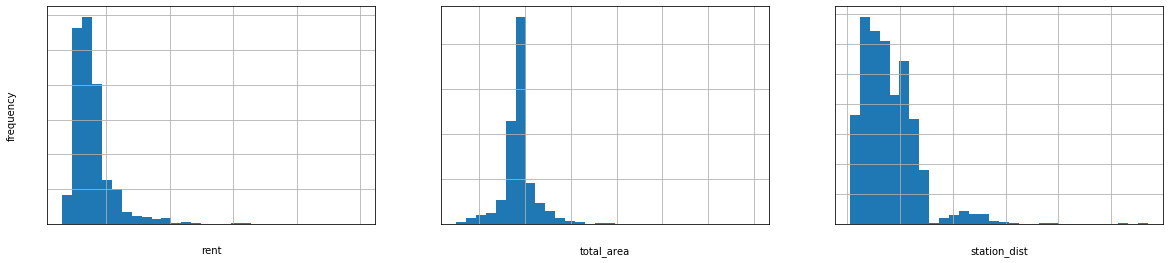

In [54]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
df_apartment1['rent'].hist(bins=30)
plt.xlabel('rent')
plt.ylabel('frequency')
plt.subplot(1, 3, 2)
df_apartment1['total_area'].hist(bins=30)
plt.xlabel('total_area')
plt.subplot(1, 3, 3)
df_apartment1['distance1'].hist(bins=30)
plt.xlabel('station_dist')
plt.show()

Ограничимся данными, попдаюащими в интервал 1-99 %

In [55]:
df_apartment.quantile([0.01, 0.99])

,rent,distance1,distance2,distance3,floor,total_num_floors,total_area,living_area,kitchen_area
0.01,20.0,0.2,0.000,0.000,1.0,3.0,16.992,0.0,0.000
0.99,100.0,5.1,5.502,4.602,23.0,32.0,60.000,36.0,21.006


In [56]:
df_apartment1.drop(df_apartment1[df_apartment1['rent'] > 90].index, inplace=True)
df_apartment1.drop(df_apartment1[df_apartment1['total_area'] > 60].index, inplace=True)
df_apartment1.drop(df_apartment1[df_apartment1['distance1'] > 4.6].index, inplace=True)

In [57]:
#Убедимся, что max стоимость аренды теперь 90 т.р., а не 250 т.р
df_apartment1.rent.max()

90.0

In [58]:
df_apartment1.shape

(1906, 24)

Построим аналогичный график, после отсеивания выбросов

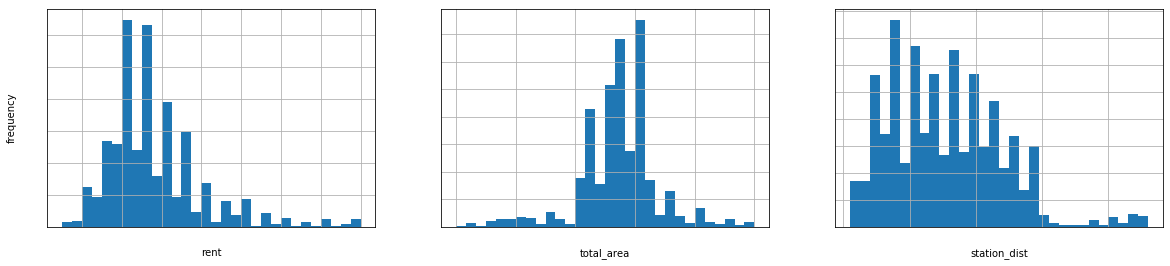

In [59]:
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
df_apartment1['rent'].hist(bins=30)
plt.xlabel('rent')
plt.ylabel('frequency')
plt.subplot(1, 3, 2)
df_apartment1['total_area'].hist(bins=30)
plt.xlabel('total_area')
plt.subplot(1, 3, 3)
df_apartment1['distance1'].hist(bins=30)
plt.xlabel('station_dist')
plt.show()

Text(0.5, 0, 'Растояние до метро, км')

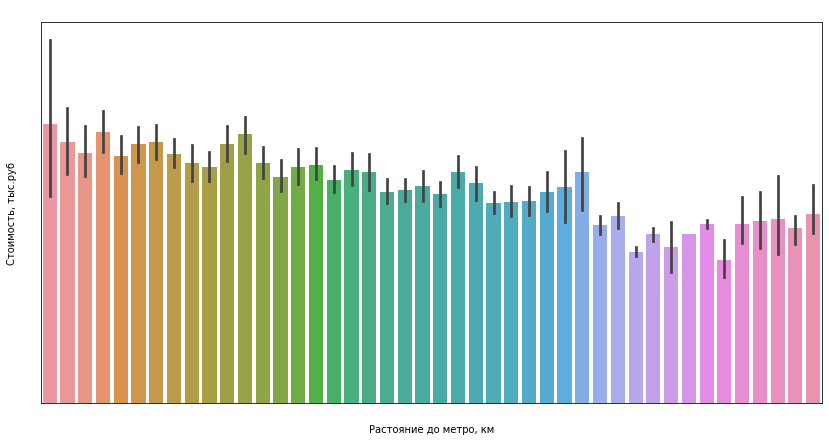

In [86]:
import seaborn as sns
plt.figure(figsize=(14,7))
# Add title
plt.title("Зависимость стоимости аренды от расстояния до метро")
sns.barplot(x=df_apartment1['distance1'], y=df_apartment1['rent'])
# Add label for vertical axis
plt.ylabel("Стоимость, тыс.руб")
plt.xlabel("Растояние до метро, км")

Text(0.5, 0, 'Общая площадь квартиры, кв.м.')

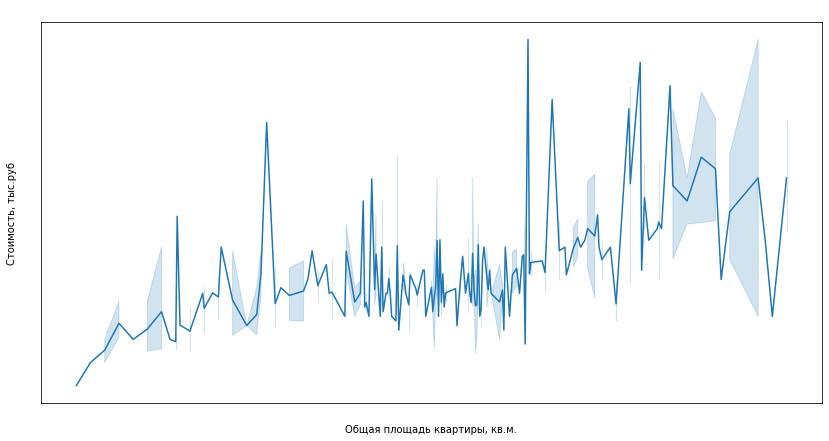

In [89]:
plt.figure(figsize=(14,7))
# Add title
plt.title("Зависимость стоимости аренды от площади")
sns.lineplot(x=df_apartment1['total_area'], y=df_apartment1['rent'])
# Add label for vertical axis
plt.ylabel("Стоимость, тыс.руб")
plt.xlabel("Общая площадь квартиры, кв.м.")

Как видно, стоимость аренды жилья учитывает много различных факторов. На предыдущем графики видны скачки цен, обусловленные какими-то иными признаками, отличными от площади квартиры. Интересно было бы проверить стоимость жилья в зависимости от удаленности от центра города. Эта задача будет решена после проведения геокодирования.

## 3. Прогнозирование стоимости

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df_apartment1[['distance1','distance2','distance3','floor', 'total_num_floors', 'total_area', 'living_area', 'kitchen_area', 
         'landlord_agency', 'landlord_owner', 'block_building', 
         'wood_building', 'brick_building', 'monolite_building', 'panel_building', '1_room', 'studio']]
y = df_apartment1['rent']
ln_y = np.log(df_apartment1['rent'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [74]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=500,learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)],
             verbose=False)

C:\Users\AVP\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:05:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [75]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))


Mean Absolute Error: 6.491416904006739


Text(0.5, 0, 'Растояние до метро, км')

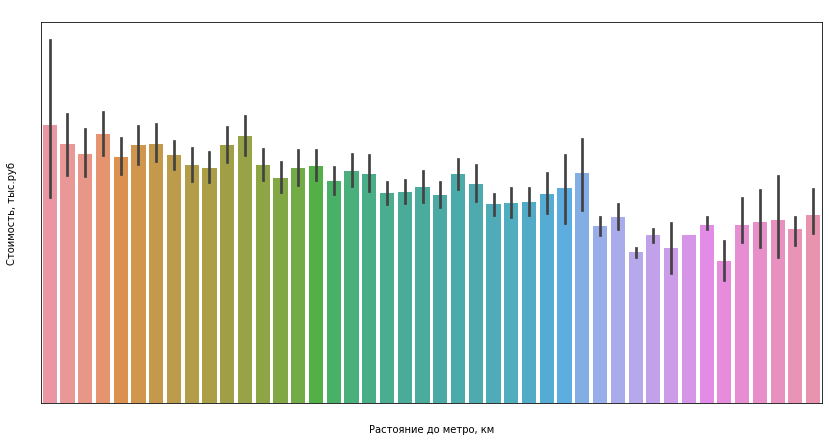